In [1]:
import numpy as np

import array, random, time, copy
from deap import base, creator, benchmarks, tools, algorithms
import time

from matplotlib import cm
import matplotlib.pyplot as plt

random.seed(42)

In [2]:
import seaborn as sns

sns.set(style='whitegrid')
sns.set_context('notebook')

$$\text{Esfera:  } f(\mathbf{x}) = \sum_{i=0}^{N-1}x_i^2 $$

#### funções criadas para possibilitar o uso da estrategia evolucionaria 1+1

Se tornou necessaria a criação de funções pois não foram achadas funções na deap que fizessem cruzamento de um único individuo, também houve problemas trabalhar com populações de um único individuo. Apesar de ter feito pesquisas na documentação do Deap, não foram achadas maneiras de contornar o problema.

In [3]:
def sphere(ind):
    result=0
    for i in ind:
        result = (i**2) + result
    return result 
# como os números são elevados ao quadrado,esse resultado 
# sempre é positivo, por isso não precisa ser tratado para 
# números negativos

def mate(ind):
    new_ind=[]
    for i in ind:
        new_ind.append(i+np.random.normal(0,1))
    return new_ind


def select_ind(ind1, ind2):
    if sphere(ind1) < sphere(ind2):
        return ind1
    else:
        return ind2
    
def es_one_plus_one(ind_size, n_gen):# (1+1) estrategia evolucionaria
    results = []
    ind = [random.uniform(-100,100) for i in range(ind_size)]
    for i in range(n_gen):
        new_ind = mate(ind)
        ind = select_ind(ind, new_ind)
        results.append(ind)
    return results

In [27]:
def plot_results(ind_size, n_gen):
    results = es_one_plus_one(ind_size, n_gen)

    fig, ax1 = plt.subplots()
    
    line1 = ax1.plot([i for i in range(n_gen)], [sphere(i) for i in results], label="value")
    
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Sphere f(x)")
    
    labs = ['value', 'Average']

    plt.show()

### tamanho de individuo = 2

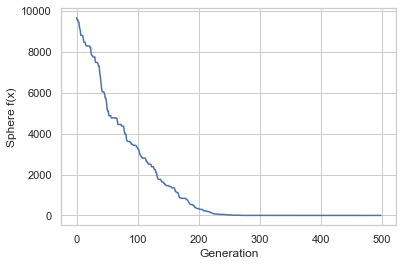

In [28]:
plot_results(2,500)

### tamanho de individuo = 10

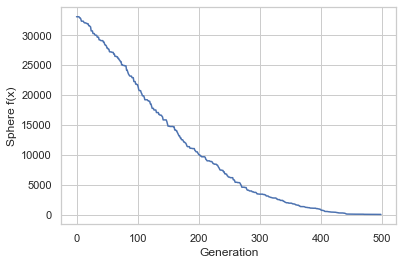

<Figure size 720x360 with 0 Axes>

In [6]:
plot_results(10,500)#500 gerações

### tamanho de individuo = 25

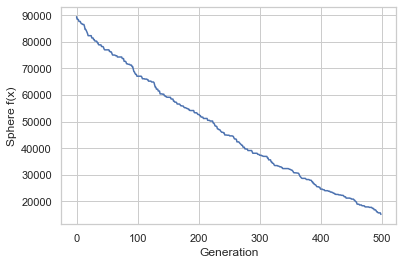

<Figure size 720x360 with 0 Axes>

In [7]:
plot_results(25,500)

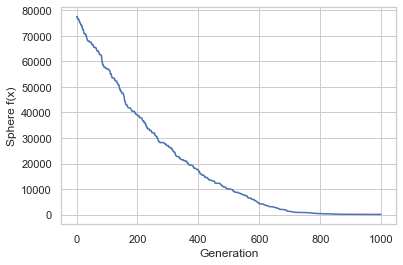

<Figure size 720x360 with 0 Axes>

In [8]:
plot_results(25,1000)

### tamanho de individuo = 50

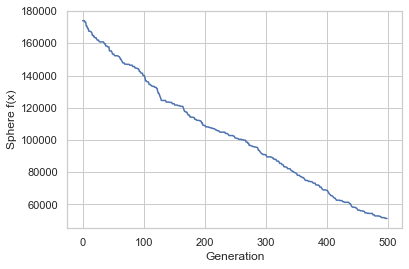

<Figure size 720x360 with 0 Axes>

In [9]:
plot_results(50,500)

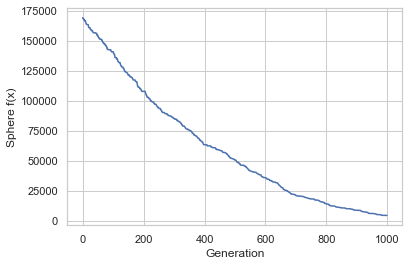

<Figure size 720x360 with 0 Axes>

In [10]:
plot_results(50,1000)

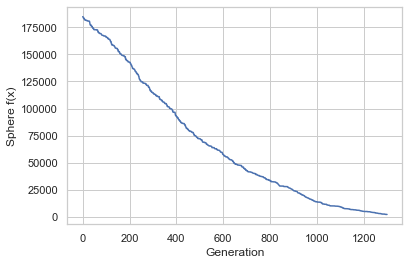

<Figure size 720x360 with 0 Axes>

In [11]:
plot_results(50,1300)

### tamanho de individuo = 100

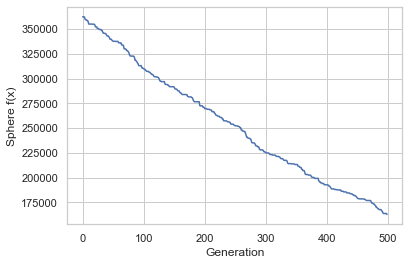

<Figure size 720x360 with 0 Axes>

In [12]:
plot_results(100,500)

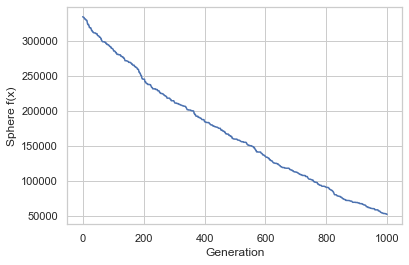

<Figure size 720x360 with 0 Axes>

In [13]:
plot_results(100,1000)

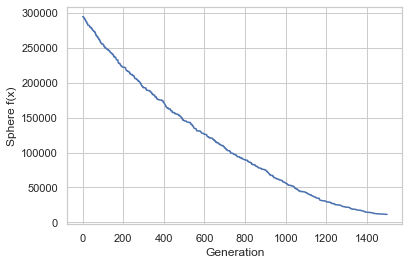

<Figure size 720x360 with 0 Axes>

In [14]:
plot_results(100,1500)

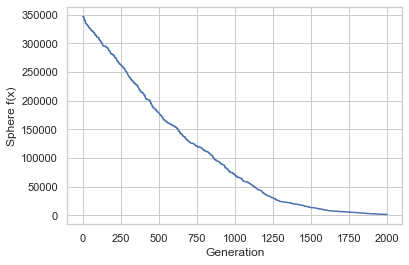

<Figure size 720x360 with 0 Axes>

In [15]:
plot_results(100,2000)

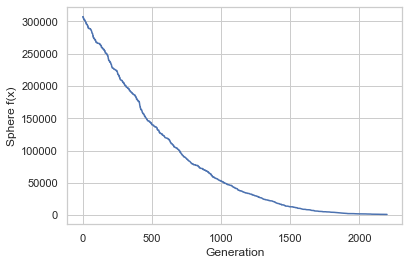

<Figure size 720x360 with 0 Axes>

In [16]:
plot_results(100,2200)

Quanto maior o tamanho do individuo foi necessario um maior número de gerações para se chegar no valor optimo: $$f(x)=0$$ Isso é esperado pois, quando maior o tamanho de itens em um individuo mais dificil vai ser que o somatorio do quadrado dos mesmos chegem ao valor de zero. Enquanto individuos de tamanho 10 chegam ao valor zero em menos de 500 gerações, individuos de tamanho 100 necessitam mais de 2000 gerações para chegar ao mesmo valor.

# Variação do melhor resultado depois de 500 gerações para diferentes tamanhos de individuo

In [21]:
ind_sizes=[i for i in range(1,201)] #criar lista de tamanhos de invidiuos entre 1 e 100

In [22]:
n_gen=500
best_fit=[]
time=[]
for ind_size in ind_sizes:
    results=es_one_plus_one(ind_size, n_gen)
    
    best_fit.append(sphere(results[n_gen-1]))

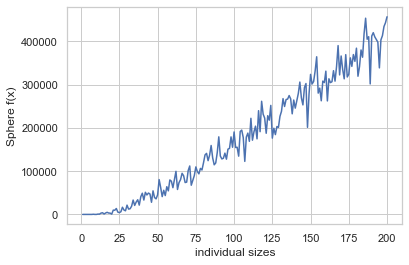

In [24]:
fig, ax1 = plt.subplots()
line1 = ax1.plot(ind_sizes, best_fit, label="value")
ax1.set_xlabel("individual sizes")
ax1.set_ylabel("Sphere f(x)")

labs = ['value', 'Average']

plt.show()

Esse comportamento também pode ser visto pelo graficos traçado a cima, que mostra os melhores resultados obtidos para diferentes tamanhos de inviduos, entre 1 e 200, para 500 gerações, é claramente visto que enquanto os individuos com tamanhos pequenos tiveram resultados bem proximos do optimo individuos com maiores tamanhos, ficaram muito longe do valor desejado.